# checking benford's law against historical daily price and volume data for all US-based stocks and ETFs trading on the NYSE, NASDAQ, and NYSE MKT.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/vbr.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/dvy.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/syv.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/labu.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/axjl.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/idlv.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/ewc.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/iyf.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/rpg.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/sbm.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/ibnd.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/dgrs.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/vcsh.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/ETFs/dgp.us.txt


/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/rjn.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/rigs.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/qid.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/efad.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/spxh.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/ftcs.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/dyy.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/scij.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/emag.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/fyx.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/scc.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/fgb.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/ETFs/ivov.us.txt
/kagg

/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/dar.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/prkr.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/ffsg.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/nem.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/bxmt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/irix.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/dac.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/hylb.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/vrtx.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/yndx.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/gfnsl.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/stfc.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs

/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/ircp.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/mrdnw.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/exg.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/dse.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/wwr.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/frt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/iep.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/hzo.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/zeal.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/tphs.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/sstk.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/hdlv.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Da

/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/hope.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/mnkd.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/psa_c.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/pdp.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/hylv.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/hebt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/frac.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/pra.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/aimc.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/jci.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/brid.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/nnbr.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs

/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/bidu.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/ljpc.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/aimt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/aoxg.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/bbgi.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/xel.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/sfs.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/tvty.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/afmd.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/rhi.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/amh_d.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/avgo.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/lexea.us.txt
/kaggle/input/price-volume-data-for-all

/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/tcon.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/dd.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/c_l.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/glbs.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/nudm.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/ht_c.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/bud.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/atvi.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/yin.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/arr_a.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/usb_o.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/kbal.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/smmf.us.txt
/kaggle/input/price-volume-data-for-all-u

/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/nk.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/hi.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/tcf_c.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/mgm.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/leju.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/tpiv.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/vrsk.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/shld.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/sqbg.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/gtt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/rht.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/hska.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/mhla.us.txt
/kaggle/input/price-volume-data-for-all-us-s

/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/jpse.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/igvt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/jphf.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/esq.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/nxq.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/nanr.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/isd.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/bt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/srdx.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/atri.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/dwdp.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/sbux.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/eqc.us.txt
/kaggle/input/price-volume-data-for-all-us-s

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math


def firstDigit(number):
    if number == 0:
        return 0
    else:
        digits = (int)(math.log10(number)) 
        number = (int)(number / pow(10, digits)) 
        return number
    
    
def graph(data,col_name):
    col = data
    length = len(col)
    
    dict_freq = {}
    for i in range(1,10):
        dict_freq[str(i)] = 0
    for i in col:
        if i>0:
            f_digit = firstDigit(i)
            dict_freq[str(f_digit)]+=1

    benford_dict = {}
    for i in range(1,10):
        benford_dict[str(i)] = math.log10(1+1/i)
    freq_ben = np.array(list(benford_dict.values()))
    total_entries = 0
    for i in list(dict_freq.values()):
        total_entries+=i
        
        
    digits = list(dict_freq.keys())
    frequency = list(dict_freq.values())
    benford_freq = freq_ben * total_entries

    fig = plt.figure(figsize = (8, 3))
    plt.bar(range(len(dict_freq)),frequency,tick_label=digits,color = 'orange')
    plt.plot(digits,frequency,label=f"Realtime-{col_name} Metric Analysis",color='black',linestyle='dashed',linewidth=3,marker='o')
    plt.plot(digits,benford_freq,label="Actual Benford's Analysis",color='blue',linestyle='dashed',linewidth=3,marker='*')
    plt.xlabel('Digits')
    plt.ylabel('Frequency')
    plt.legend()
    plt.savefig(f'result_{col_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
#     print(dict_freq)

# All

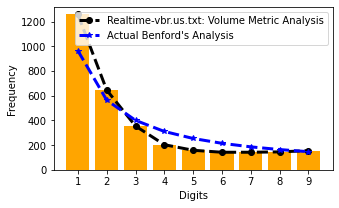

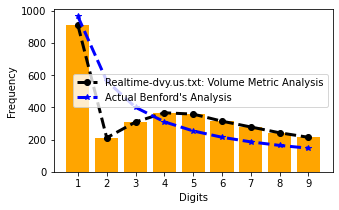

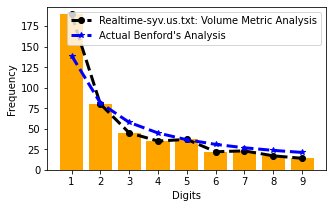

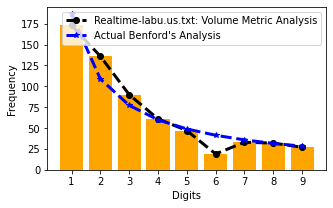

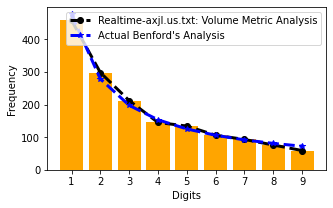

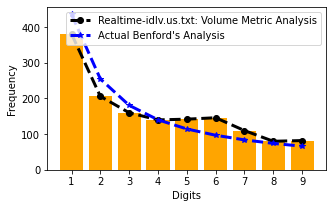

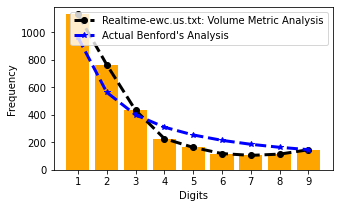

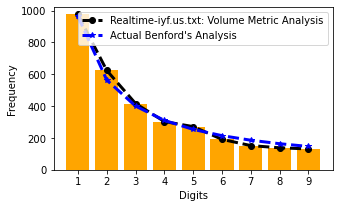

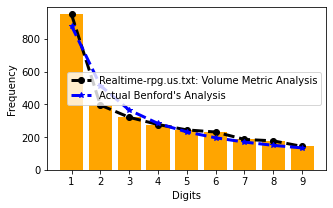

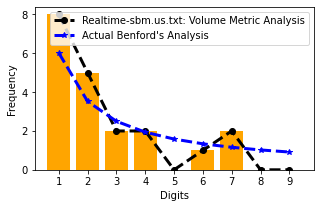

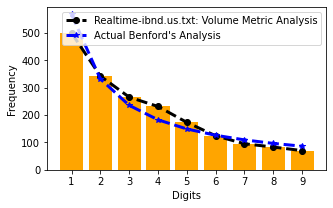

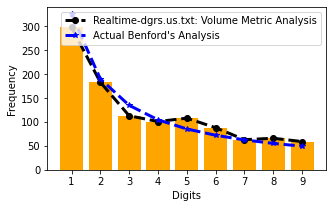

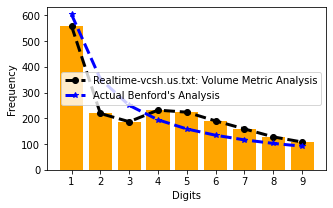

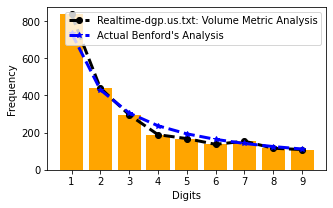

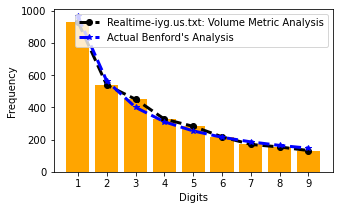

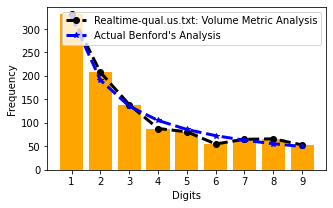

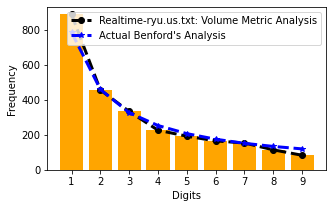

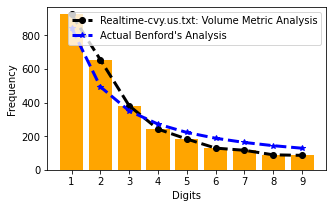

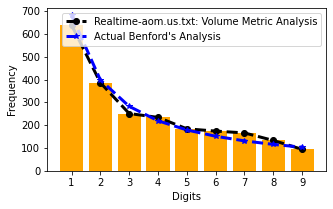

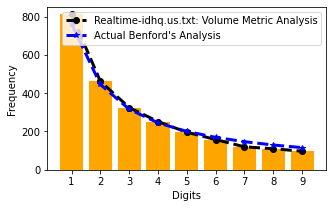

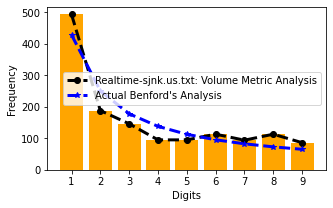

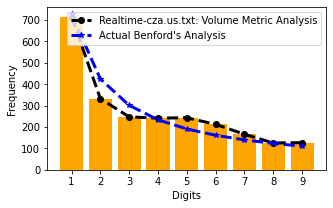

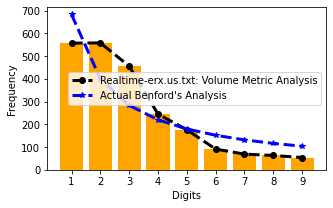

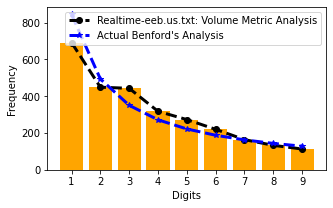

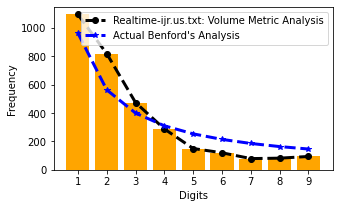

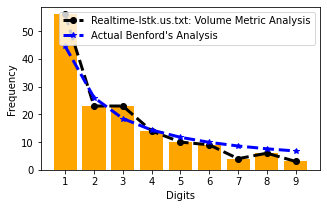

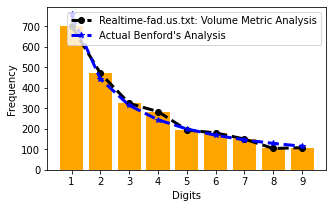

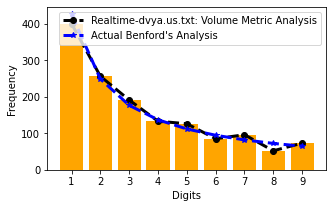

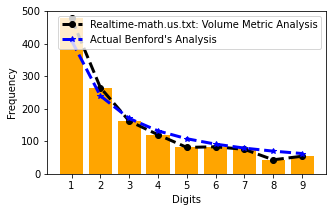

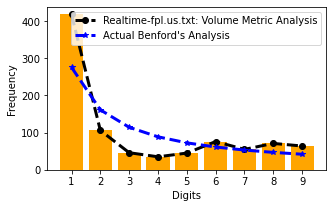

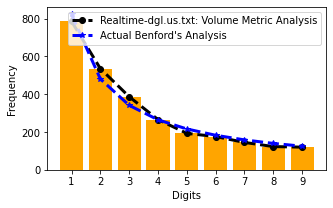

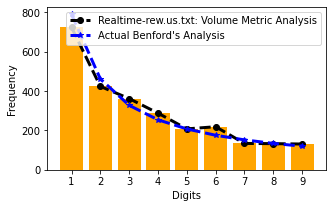

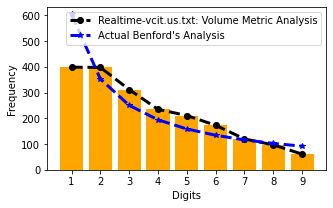

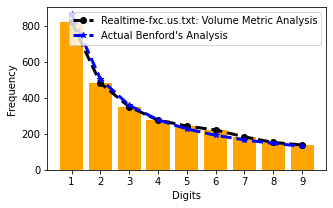

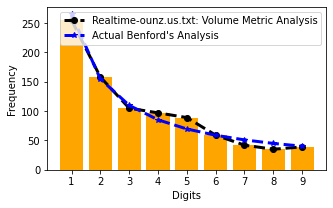

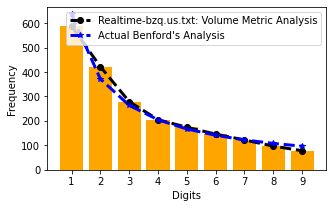

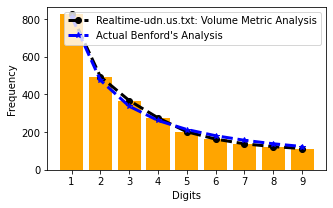

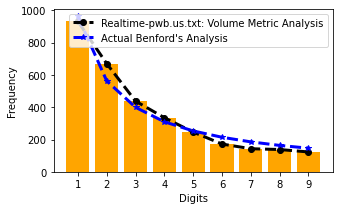

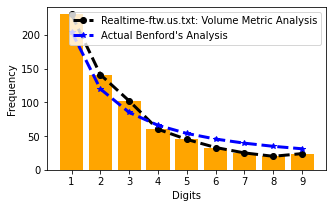

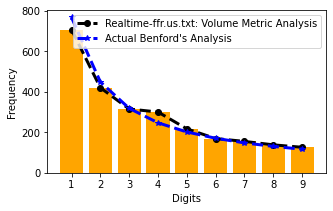

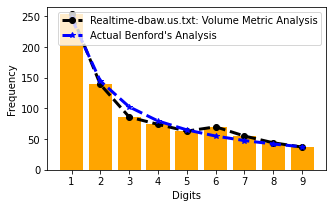

KeyboardInterrupt: 

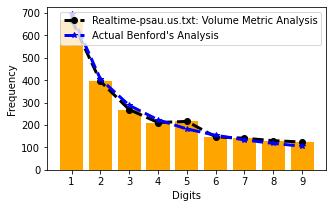

In [4]:
i = 0
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        Volume = np.asarray(pd.read_csv(os.path.join(dirname, filename))['Volume'])
        graph(Volume,filename+': Volume')
        i = i+1
        if i==50:
            break